#### To build a Model to predict Credit risk score card based on Key financial ratios of NBFC's

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading Data Set

In [2]:
df = pd.read_excel("Cleaned Ratios.xlsx")
df.shape

(355, 30)

In [3]:
df.head()


,S.No.,NBFC Name,Year,Basic EPS (Rs.),Diluted EPS (Rs.),Cash EPS (Rs.),Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Revenue from Operations/Share (Rs.),PBDIT/Share (Rs.),...,Asset Turnover Ratio (%),Current Ratio (X),Quick Ratio (X),Enterprise Value (Cr.),EV/Net Operating Revenue (X),EV/EBITDA (X),MarketCap/Net Operating Revenue (X),Price/BV (X),Price/Net Operating Revenue,Interest Coverage Ratios (%)
0,1,A.K.Capital Services Ltd.,2019,35.62,35.62,37.50,585.26,585.26,128.38,73.98,...,17.91,129.05,129.05,291.01,3.43,5.96,2.56,0.56,2.56,1.63
1,2,A.K.Capital Services Ltd.,2018,28.88,28.88,31.01,556.08,556.08,159.35,95.44,...,17.80,186.26,186.26,478.93,4.55,7.60,2.56,0.73,2.56,1.66
2,3,A.K.Capital Services Ltd.,2017,36.93,36.93,39.32,538.65,538.65,140.64,92.90,...,12.37,1.08,1.08,635.60,6.85,10.37,2.78,0.73,2.78,1.84
3,4,A.K.Capital Services Ltd.,2016,28.14,28.14,31.09,501.72,501.72,103.55,61.46,...,12.89,1.20,1.20,331.54,4.85,8.17,2.24,0.46,2.24,1.73
4,5,A.K.Capital Services Ltd.,2015,27.74,27.74,30.86,480.80,480.80,143.35,73.16,...,18.32,1.09,1.09,303.09,3.20,6.28,1.62,0.48,1.62,1.77


### Descriptive Statistics of Data Set

In [4]:
df.describe()


,S.No.,Year,Basic EPS (Rs.),Diluted EPS (Rs.),Cash EPS (Rs.),Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Revenue from Operations/Share (Rs.),PBDIT/Share (Rs.),PBIT/Share (Rs.),...,Asset Turnover Ratio (%),Current Ratio (X),Quick Ratio (X),Enterprise Value (Cr.),EV/Net Operating Revenue (X),EV/EBITDA (X),MarketCap/Net Operating Revenue (X),Price/BV (X),Price/Net Operating Revenue,Interest Coverage Ratios (%)
count,355.000000,355.00000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,323.000000
mean,436.521127,2017.00000,4.606263,4.523784,5.212924,92.948338,93.067944,51.744310,25.989746,25.212254,...,19.559972,168.551775,166.547634,6355.175352,32.282730,54.083333,16.141751,2.533507,16.151812,445.564004
std,212.049180,1.41621,42.979427,42.882515,43.027822,157.831369,157.804197,116.133775,80.476803,80.016883,...,44.007966,1393.686363,1393.730052,24522.300451,209.468881,218.996489,45.080483,5.881727,45.136392,2858.565909
min,1.000000,2015.00000,-433.760000,-433.760000,-431.230000,-558.670000,-558.670000,0.090000,-396.510000,-399.040000,...,0.020000,-445.310000,-445.310000,-7.190000,-3.330000,-406.580000,0.030000,-0.080000,0.030000,-2205.020000
25%,279.500000,2016.00000,0.170000,0.170000,0.245000,18.850000,18.850000,2.595000,0.560000,0.535000,...,7.395000,1.355000,1.110000,11.070000,3.150000,6.115000,1.690000,0.410000,1.690000,1.370000
50%,468.000000,2017.00000,1.680000,1.660000,1.780000,40.880000,40.880000,9.180000,4.570000,4.530000,...,11.370000,3.030000,2.470000,87.560000,7.040000,11.210000,3.340000,0.850000,3.340000,1.880000
75%,616.500000,2018.00000,8.470000,8.470000,9.410000,93.950000,93.950000,37.440000,25.800000,25.135000,...,16.030000,20.550000,18.165000,889.950000,12.425000,22.226250,9.930000,2.191250,9.935000,11.345000
max,755.000000,2019.00000,242.300000,238.830000,249.270000,1386.860000,1386.860000,1364.020000,923.950000,913.430000,...,696.810000,19032.050000,19032.050000,260598.500000,3637.110000,2330.790000,466.370000,50.110000,467.630000,34310.440000


### DImensions of Data set

In [5]:
df.shape

(355, 30)

In [6]:
df1 = df[df.columns[3:]]

In [7]:
df1.describe()

,Basic EPS (Rs.),Diluted EPS (Rs.),Cash EPS (Rs.),Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Revenue from Operations/Share (Rs.),PBDIT/Share (Rs.),PBIT/Share (Rs.),PBT/Share (Rs.),Net Profit/Share (Rs.),...,Asset Turnover Ratio (%),Current Ratio (X),Quick Ratio (X),Enterprise Value (Cr.),EV/Net Operating Revenue (X),EV/EBITDA (X),MarketCap/Net Operating Revenue (X),Price/BV (X),Price/Net Operating Revenue,Interest Coverage Ratios (%)
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,323.000000
mean,4.606263,4.523784,5.212924,92.948338,93.067944,51.744310,25.989746,25.212254,7.089155,4.421871,...,19.559972,168.551775,166.547634,6355.175352,32.282730,54.083333,16.141751,2.533507,16.151812,445.564004
std,42.979427,42.882515,43.027822,157.831369,157.804197,116.133775,80.476803,80.016883,51.683068,42.933994,...,44.007966,1393.686363,1393.730052,24522.300451,209.468881,218.996489,45.080483,5.881727,45.136392,2858.565909
min,-433.760000,-433.760000,-431.230000,-558.670000,-558.670000,0.090000,-396.510000,-399.040000,-581.480000,-433.760000,...,0.020000,-445.310000,-445.310000,-7.190000,-3.330000,-406.580000,0.030000,-0.080000,0.030000,-2205.020000
25%,0.170000,0.170000,0.245000,18.850000,18.850000,2.595000,0.560000,0.535000,0.235000,0.160000,...,7.395000,1.355000,1.110000,11.070000,3.150000,6.115000,1.690000,0.410000,1.690000,1.370000
50%,1.680000,1.660000,1.780000,40.880000,40.880000,9.180000,4.570000,4.530000,2.270000,1.660000,...,11.370000,3.030000,2.470000,87.560000,7.040000,11.210000,3.340000,0.850000,3.340000,1.880000
75%,8.470000,8.470000,9.410000,93.950000,93.950000,37.440000,25.800000,25.135000,11.870000,8.385000,...,16.030000,20.550000,18.165000,889.950000,12.425000,22.226250,9.930000,2.191250,9.935000,11.345000
max,242.300000,238.830000,249.270000,1386.860000,1386.860000,1364.020000,923.950000,913.430000,366.870000,238.750000,...,696.810000,19032.050000,19032.050000,260598.500000,3637.110000,2330.790000,466.370000,50.110000,467.630000,34310.440000


### Finding out Missing Values

In [8]:
df1.isnull().sum()

Basic EPS (Rs.)                               0
Diluted EPS (Rs.)                             0
Cash EPS (Rs.)                                0
Book Value [ExclRevalReserve]/Share (Rs.)     0
Book Value [InclRevalReserve]/Share (Rs.)     0
Revenue from Operations/Share (Rs.)           0
PBDIT/Share (Rs.)                             0
PBIT/Share (Rs.)                              0
PBT/Share (Rs.)                               0
Net Profit/Share (Rs.)                        0
PBDIT Margin (%)                              0
PBIT Margin (%)                               0
PBT Margin (%)                                0
Net Profit Margin (%)                         0
Return on Networth / Equity (%)               0
Return on Capital Employed (%)                0
Return on Assets (%)                          0
Asset Turnover Ratio (%)                      0
Current Ratio (X)                             0
Quick Ratio (X)                               0
Enterprise Value (Cr.)                  

In [9]:
df1.isnull().sum()*100/len(df)

Basic EPS (Rs.)                              0.000000
Diluted EPS (Rs.)                            0.000000
Cash EPS (Rs.)                               0.000000
Book Value [ExclRevalReserve]/Share (Rs.)    0.000000
Book Value [InclRevalReserve]/Share (Rs.)    0.000000
Revenue from Operations/Share (Rs.)          0.000000
PBDIT/Share (Rs.)                            0.000000
PBIT/Share (Rs.)                             0.000000
PBT/Share (Rs.)                              0.000000
Net Profit/Share (Rs.)                       0.000000
PBDIT Margin (%)                             0.000000
PBIT Margin (%)                              0.000000
PBT Margin (%)                               0.000000
Net Profit Margin (%)                        0.000000
Return on Networth / Equity (%)              0.000000
Return on Capital Employed (%)               0.000000
Return on Assets (%)                         0.000000
Asset Turnover Ratio (%)                     0.000000
Current Ratio (X)           

In [10]:
df1.dropna(axis=0, how='any')

,Basic EPS (Rs.),Diluted EPS (Rs.),Cash EPS (Rs.),Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Revenue from Operations/Share (Rs.),PBDIT/Share (Rs.),PBIT/Share (Rs.),PBT/Share (Rs.),Net Profit/Share (Rs.),...,Asset Turnover Ratio (%),Current Ratio (X),Quick Ratio (X),Enterprise Value (Cr.),EV/Net Operating Revenue (X),EV/EBITDA (X),MarketCap/Net Operating Revenue (X),Price/BV (X),Price/Net Operating Revenue,Interest Coverage Ratios (%)
0,35.62,35.62,37.50,585.26,585.26,128.38,73.98,72.11,47.86,35.62,...,17.91,129.05,129.05,291.01,3.43,5.96,2.56,0.56,2.56,1.63
1,28.88,28.88,31.01,556.08,556.08,159.35,95.44,93.30,43.01,28.88,...,17.80,186.26,186.26,478.93,4.55,7.60,2.56,0.73,2.56,1.66
2,36.93,36.93,39.32,538.65,538.65,140.64,92.90,90.51,54.89,36.93,...,12.37,1.08,1.08,635.60,6.85,10.37,2.78,0.73,2.78,1.84
3,28.14,28.14,31.09,501.72,501.72,103.55,61.46,58.52,41.33,28.14,...,12.89,1.20,1.20,331.54,4.85,8.17,2.24,0.46,2.24,1.73
4,27.74,27.74,30.86,480.80,480.80,143.35,73.16,70.04,41.96,27.74,...,18.32,1.09,1.09,303.09,3.20,6.28,1.62,0.48,1.62,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,9.88,9.88,9.88,95.99,95.99,35.46,34.41,34.41,14.16,9.88,...,7.62,1.28,1.28,390.17,11.80,12.16,1.83,0.68,1.83,1.70
351,7.90,7.90,7.90,87.56,87.56,26.10,25.07,25.07,11.30,7.90,...,7.42,1.43,1.43,290.55,11.94,12.43,2.38,0.71,2.38,1.82
352,4.68,4.68,4.69,80.87,80.87,13.62,12.75,12.75,7.05,4.68,...,6.95,2.50,2.50,117.71,9.27,9.90,1.58,0.27,1.58,2.24
353,0.33,0.33,0.34,76.18,76.18,2.16,1.94,1.94,0.52,0.33,...,1.92,1.90,1.90,55.47,27.61,30.65,11.37,0.32,11.37,1.37


In [11]:
df1.isnull().sum()

Basic EPS (Rs.)                               0
Diluted EPS (Rs.)                             0
Cash EPS (Rs.)                                0
Book Value [ExclRevalReserve]/Share (Rs.)     0
Book Value [InclRevalReserve]/Share (Rs.)     0
Revenue from Operations/Share (Rs.)           0
PBDIT/Share (Rs.)                             0
PBIT/Share (Rs.)                              0
PBT/Share (Rs.)                               0
Net Profit/Share (Rs.)                        0
PBDIT Margin (%)                              0
PBIT Margin (%)                               0
PBT Margin (%)                                0
Net Profit Margin (%)                         0
Return on Networth / Equity (%)               0
Return on Capital Employed (%)                0
Return on Assets (%)                          0
Asset Turnover Ratio (%)                      0
Current Ratio (X)                             0
Quick Ratio (X)                               0
Enterprise Value (Cr.)                  

In [12]:
df1.describe()

,Basic EPS (Rs.),Diluted EPS (Rs.),Cash EPS (Rs.),Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Revenue from Operations/Share (Rs.),PBDIT/Share (Rs.),PBIT/Share (Rs.),PBT/Share (Rs.),Net Profit/Share (Rs.),...,Asset Turnover Ratio (%),Current Ratio (X),Quick Ratio (X),Enterprise Value (Cr.),EV/Net Operating Revenue (X),EV/EBITDA (X),MarketCap/Net Operating Revenue (X),Price/BV (X),Price/Net Operating Revenue,Interest Coverage Ratios (%)
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,323.000000
mean,4.606263,4.523784,5.212924,92.948338,93.067944,51.744310,25.989746,25.212254,7.089155,4.421871,...,19.559972,168.551775,166.547634,6355.175352,32.282730,54.083333,16.141751,2.533507,16.151812,445.564004
std,42.979427,42.882515,43.027822,157.831369,157.804197,116.133775,80.476803,80.016883,51.683068,42.933994,...,44.007966,1393.686363,1393.730052,24522.300451,209.468881,218.996489,45.080483,5.881727,45.136392,2858.565909
min,-433.760000,-433.760000,-431.230000,-558.670000,-558.670000,0.090000,-396.510000,-399.040000,-581.480000,-433.760000,...,0.020000,-445.310000,-445.310000,-7.190000,-3.330000,-406.580000,0.030000,-0.080000,0.030000,-2205.020000
25%,0.170000,0.170000,0.245000,18.850000,18.850000,2.595000,0.560000,0.535000,0.235000,0.160000,...,7.395000,1.355000,1.110000,11.070000,3.150000,6.115000,1.690000,0.410000,1.690000,1.370000
50%,1.680000,1.660000,1.780000,40.880000,40.880000,9.180000,4.570000,4.530000,2.270000,1.660000,...,11.370000,3.030000,2.470000,87.560000,7.040000,11.210000,3.340000,0.850000,3.340000,1.880000
75%,8.470000,8.470000,9.410000,93.950000,93.950000,37.440000,25.800000,25.135000,11.870000,8.385000,...,16.030000,20.550000,18.165000,889.950000,12.425000,22.226250,9.930000,2.191250,9.935000,11.345000
max,242.300000,238.830000,249.270000,1386.860000,1386.860000,1364.020000,923.950000,913.430000,366.870000,238.750000,...,696.810000,19032.050000,19032.050000,260598.500000,3637.110000,2330.790000,466.370000,50.110000,467.630000,34310.440000


#### df.describe() function:
* is used to find out the summary statistics of the data set like Mean, STd.Deviation so on.. of the data set


* This table shows the Average :
  ROA, ROCE, EBIT, ICR for each company for each year

In [13]:
# Correlation matrix here
df1.corr()

,Basic EPS (Rs.),Diluted EPS (Rs.),Cash EPS (Rs.),Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Revenue from Operations/Share (Rs.),PBDIT/Share (Rs.),PBIT/Share (Rs.),PBT/Share (Rs.),Net Profit/Share (Rs.),...,Asset Turnover Ratio (%),Current Ratio (X),Quick Ratio (X),Enterprise Value (Cr.),EV/Net Operating Revenue (X),EV/EBITDA (X),MarketCap/Net Operating Revenue (X),Price/BV (X),Price/Net Operating Revenue,Interest Coverage Ratios (%)
Basic EPS (Rs.),1.000000,0.999871,0.996548,0.564809,0.564826,0.338305,0.750377,0.754073,0.983089,0.997559,...,0.059136,-0.007445,-0.007354,0.136800,-0.556187,-0.011242,-0.021799,0.031237,-0.021856,0.030320
Diluted EPS (Rs.),0.999871,1.000000,0.996562,0.563140,0.563158,0.334493,0.748097,0.751835,0.982749,0.997676,...,0.058721,-0.007237,-0.007150,0.135038,-0.557306,-0.011000,-0.021814,0.031038,-0.021871,0.030566
Cash EPS (Rs.),0.996548,0.996562,1.000000,0.569798,0.569812,0.363307,0.759554,0.762082,0.986179,0.998736,...,0.069974,-0.009154,-0.009035,0.142655,-0.551279,-0.014620,-0.026125,0.029834,-0.026179,0.027446
Book Value [ExclRevalReserve]/Share (Rs.),0.564809,0.563140,0.569798,1.000000,0.999951,0.568665,0.671503,0.667128,0.580308,0.555762,...,-0.023446,0.027115,0.027737,0.282926,-0.247534,-0.079079,-0.056891,-0.070092,-0.056910,-0.021954
Book Value [InclRevalReserve]/Share (Rs.),0.564826,0.563158,0.569812,0.999951,1.000000,0.568485,0.671424,0.667051,0.580308,0.555780,...,-0.023634,0.027029,0.027652,0.282786,-0.247646,-0.079208,-0.056991,-0.070173,-0.057010,-0.022084
Revenue from Operations/Share (Rs.),0.338305,0.334493,0.363307,0.568665,0.568485,1.000000,0.759148,0.747922,0.405463,0.335063,...,0.247497,-0.045361,-0.044853,0.485698,-0.051806,-0.086844,-0.117753,-0.003903,-0.117706,-0.066424
PBDIT/Share (Rs.),0.750377,0.748097,0.759554,0.671503,0.671424,0.759148,1.000000,0.999654,0.804037,0.749822,...,0.016385,-0.030438,-0.030036,0.452012,-0.317693,-0.056949,-0.080810,0.037379,-0.080813,-0.024152
PBIT/Share (Rs.),0.754073,0.751835,0.762082,0.667128,0.667051,0.747922,0.999654,1.000000,0.806683,0.753648,...,0.010835,-0.029547,-0.029154,0.450269,-0.321514,-0.055236,-0.078499,0.039174,-0.078503,-0.022411
PBT/Share (Rs.),0.983089,0.982749,0.986179,0.580308,0.580308,0.405463,0.804037,0.806683,1.000000,0.984635,...,0.058534,-0.010553,-0.010415,0.172944,-0.461276,-0.018517,-0.031420,0.035345,-0.031460,0.018825
Net Profit/Share (Rs.),0.997559,0.997676,0.998736,0.555762,0.555780,0.335063,0.749822,0.753648,0.984635,1.000000,...,0.059670,-0.007148,-0.007052,0.134865,-0.556168,-0.010795,-0.020942,0.032832,-0.020999,0.030985


* This Scatter Plot shows the ROCE by year

* This Histogram shows the distribution of ROA which is between between -40 to +40

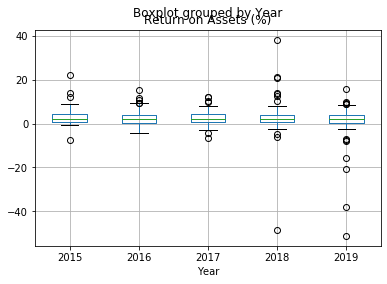

In [14]:
df.boxplot(by='Year',column=['Return on Assets (%)'],grid=True)


* This box plot shows the Year wise ROA & shows the extreme values in this data set
* As observed the values beyond -5 are considered as outliers
* Simillarly the values above 10 are considred as outliers 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D78C265B88>,
      dtype=object)

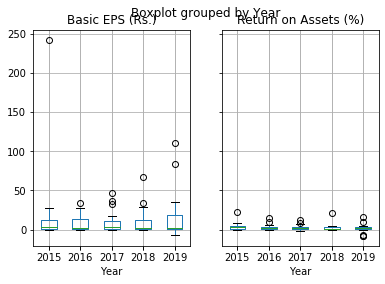

In [15]:
df[:100].boxplot(by='Year',column=['Basic EPS (Rs.)','Return on Assets (%)'],grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D78C469AC8>,
      dtype=object)

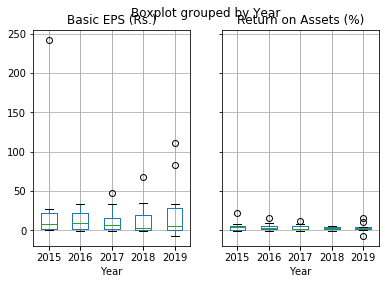

In [16]:
df[50:100].boxplot(by='Year',column=['Basic EPS (Rs.)','Return on Assets (%)'],grid=True)

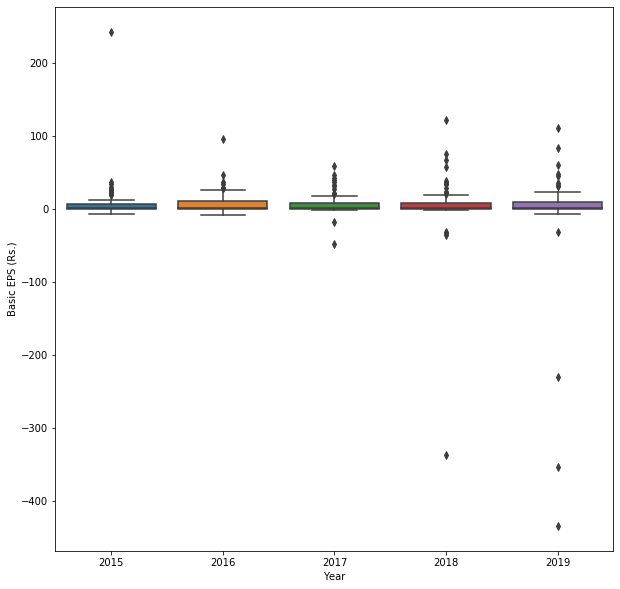

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(y='Basic EPS (Rs.)',x="Year",data=df,orient='v')
plt.show()

In [18]:
fil = df[['NBFC Name','Year','Interest Coverage Ratios (%)']]
gp=fil.groupby('Year').describe()
gp

Interest Coverage Ratios (%)                                            \
                            count        mean          std      min     25%   
Year                                                                          
2015                         58.0  425.579770  2216.403311    -0.03  1.4475   
2016                         65.0  496.582564  2894.759362   -85.76  1.3600   
2017                         65.0  805.033692  4467.058314  -398.26  1.4600   
2018                         69.0   41.979855   396.747870 -2205.02  1.3500   
2019                         66.0  480.786061  2793.326583 -2083.31  1.3700   

                              
        50%    75%       max  
Year                          
2015  2.035  12.50  16335.76  
2016  1.730  10.12  22503.65  
2017  2.240   9.10  34310.44  
2018  1.930  11.44   1997.90  
2019  1.890  11.58  21722.27

In [19]:
fil2 = df[['NBFC Name','Year','Return on Assets (%)']]
gp=fil2.groupby('Year').describe()
gp

Return on Assets (%)                                                 \
                    count      mean       std    min    25%   50%    75%   
Year                                                                       
2015                 71.0  3.146620  3.884026  -7.57  0.575  2.29  4.290   
2016                 71.0  2.900000  3.351445  -4.25  0.395  2.19  3.980   
2017                 71.0  2.628028  3.316298  -6.39  0.845  1.90  4.230   
2018                 71.0  2.686056  8.740553 -48.39  0.605  1.86  3.675   
2019                 71.0  0.603556  9.322569 -51.17  0.460  2.12  3.765   

             
        max  
Year         
2015  22.01  
2016  15.24  
2017  12.19  
2018  38.20  
2019  15.63

## Outliers and Treatment

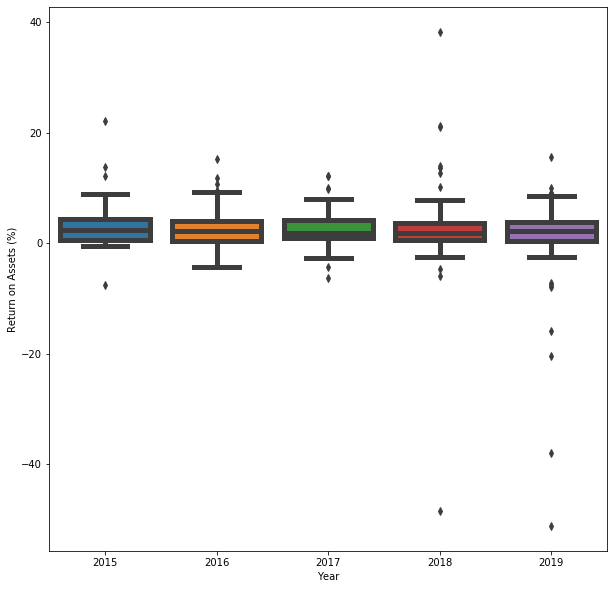

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot( x=df["Year"], y=df["Return on Assets (%)"], linewidth=5)
plt.show()

In [21]:
q1 = df['Return on Assets (%)'].quantile(0.25)
print(q1)

q3 = df['Return on Assets (%)'].quantile(0.75)
print(q3)

IQR = q3-q1
print(IQR)

outlier_threshold_right = q3 + (1.5*IQR)
outlier_threshold_left = q1 - (1.5*IQR)
print(outlier_threshold_right)
print(outlier_threshold_left)

0.59
3.98
3.39
9.065
-4.495


In [22]:
print(df['Return on Assets (%)'].quantile(0.25))
print(df['Return on Assets (%)'].quantile(0.75))

0.59
3.98


In [23]:
df["Return on Assets (%)"] = np.where(df["Return on Assets (%)"] <0.59, 0.59,df['Return on Assets (%)'])
df["Return on Assets (%)"] = np.where(df["Return on Assets (%)"] >3.98, 3.98,df['Return on Assets (%)'])
print(df['Return on Assets (%)'].skew())

0.16537117219405895


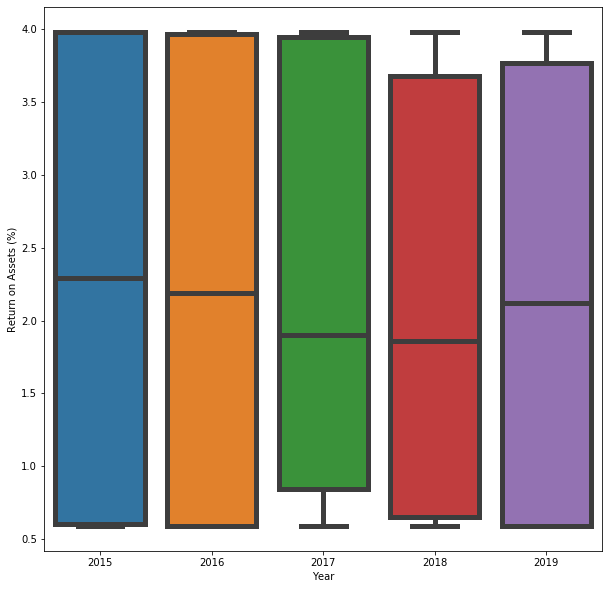

In [58]:
plt.figure(figsize=(10,10))
sns.boxplot( x=df["Year"], y=df["Return on Assets (%)"], linewidth=5)
plt.show()

### Before conversion of dependent correlation

In [24]:
df2=df1.corr()

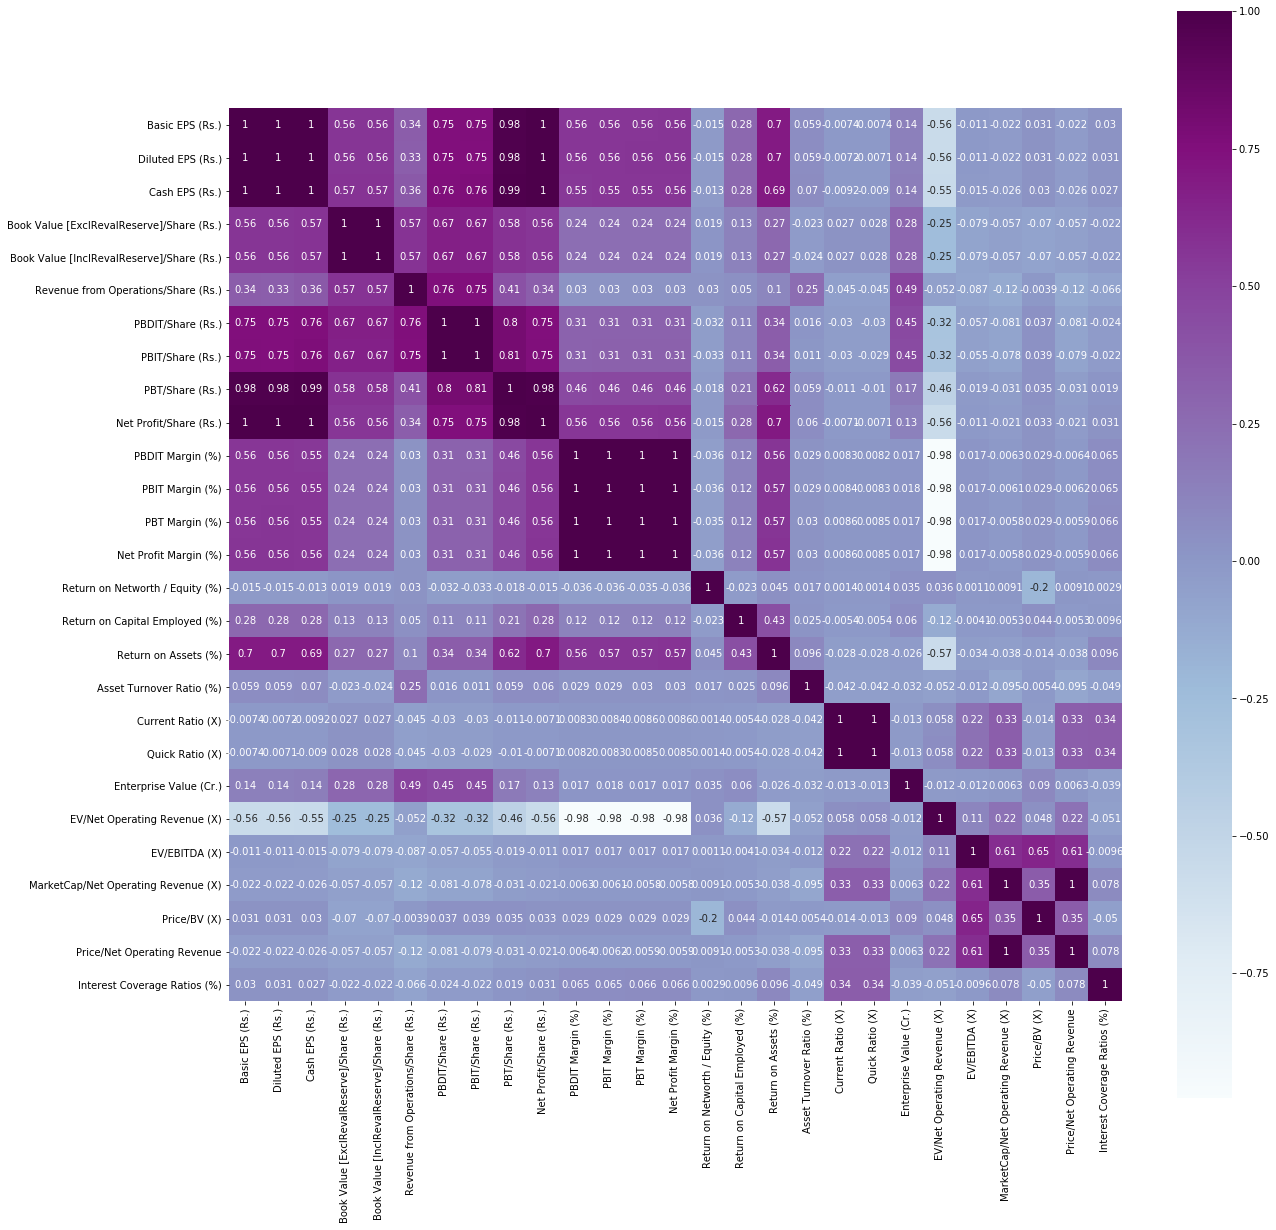

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df2,square=True,annot=True,cmap="BuPu")
plt.show()

In [26]:
a=0
while a<=354:
    if(df.iloc[a,29]<=1.5):
        df.iloc[a,29]=1
    
    else:
        df.iloc[a,29]=0
    
    a=a+1

In [27]:
df['Interest Coverage Ratios (%)'].value_counts()

0.0    250
1.0    105
Name: Interest Coverage Ratios (%), dtype: int64

In [28]:
df.to_csv("Converted data.csv")

###### Reading Data After binning

In [29]:
df_binned = pd.read_excel("Risk Ranking.xlsx")

In [30]:
df_bin_corr = df[df.columns[3:]]

In [31]:
corr = df_bin_corr.corr()
corr

,Basic EPS (Rs.),Diluted EPS (Rs.),Cash EPS (Rs.),Book Value [ExclRevalReserve]/Share (Rs.),Book Value [InclRevalReserve]/Share (Rs.),Revenue from Operations/Share (Rs.),PBDIT/Share (Rs.),PBIT/Share (Rs.),PBT/Share (Rs.),Net Profit/Share (Rs.),...,Asset Turnover Ratio (%),Current Ratio (X),Quick Ratio (X),Enterprise Value (Cr.),EV/Net Operating Revenue (X),EV/EBITDA (X),MarketCap/Net Operating Revenue (X),Price/BV (X),Price/Net Operating Revenue,Interest Coverage Ratios (%)
Basic EPS (Rs.),1.000000,0.999871,0.996548,0.564809,0.564826,0.338305,0.750377,0.754073,0.983089,0.997559,...,0.059136,-0.007445,-0.007354,0.136800,-0.556187,-0.011242,-0.021799,0.031237,-0.021856,-0.172925
Diluted EPS (Rs.),0.999871,1.000000,0.996562,0.563140,0.563158,0.334493,0.748097,0.751835,0.982749,0.997676,...,0.058721,-0.007237,-0.007150,0.135038,-0.557306,-0.011000,-0.021814,0.031038,-0.021871,-0.173253
Cash EPS (Rs.),0.996548,0.996562,1.000000,0.569798,0.569812,0.363307,0.759554,0.762082,0.986179,0.998736,...,0.069974,-0.009154,-0.009035,0.142655,-0.551279,-0.014620,-0.026125,0.029834,-0.026179,-0.178245
Book Value [ExclRevalReserve]/Share (Rs.),0.564809,0.563140,0.569798,1.000000,0.999951,0.568665,0.671503,0.667128,0.580308,0.555762,...,-0.023446,0.027115,0.027737,0.282926,-0.247534,-0.079079,-0.056891,-0.070092,-0.056910,-0.111339
Book Value [InclRevalReserve]/Share (Rs.),0.564826,0.563158,0.569812,0.999951,1.000000,0.568485,0.671424,0.667051,0.580308,0.555780,...,-0.023634,0.027029,0.027652,0.282786,-0.247646,-0.079208,-0.056991,-0.070173,-0.057010,-0.111828
Revenue from Operations/Share (Rs.),0.338305,0.334493,0.363307,0.568665,0.568485,1.000000,0.759148,0.747922,0.405463,0.335063,...,0.247497,-0.045361,-0.044853,0.485698,-0.051806,-0.086844,-0.117753,-0.003903,-0.117706,0.041797
PBDIT/Share (Rs.),0.750377,0.748097,0.759554,0.671503,0.671424,0.759148,1.000000,0.999654,0.804037,0.749822,...,0.016385,-0.030438,-0.030036,0.452012,-0.317693,-0.056949,-0.080810,0.037379,-0.080813,0.040800
PBIT/Share (Rs.),0.754073,0.751835,0.762082,0.667128,0.667051,0.747922,0.999654,1.000000,0.806683,0.753648,...,0.010835,-0.029547,-0.029154,0.450269,-0.321514,-0.055236,-0.078499,0.039174,-0.078503,0.040947
PBT/Share (Rs.),0.983089,0.982749,0.986179,0.580308,0.580308,0.405463,0.804037,0.806683,1.000000,0.984635,...,0.058534,-0.010553,-0.010415,0.172944,-0.461276,-0.018517,-0.031420,0.035345,-0.031460,-0.161610
Net Profit/Share (Rs.),0.997559,0.997676,0.998736,0.555762,0.555780,0.335063,0.749822,0.753648,0.984635,1.000000,...,0.059670,-0.007148,-0.007052,0.134865,-0.556168,-0.010795,-0.020942,0.032832,-0.020999,-0.179027


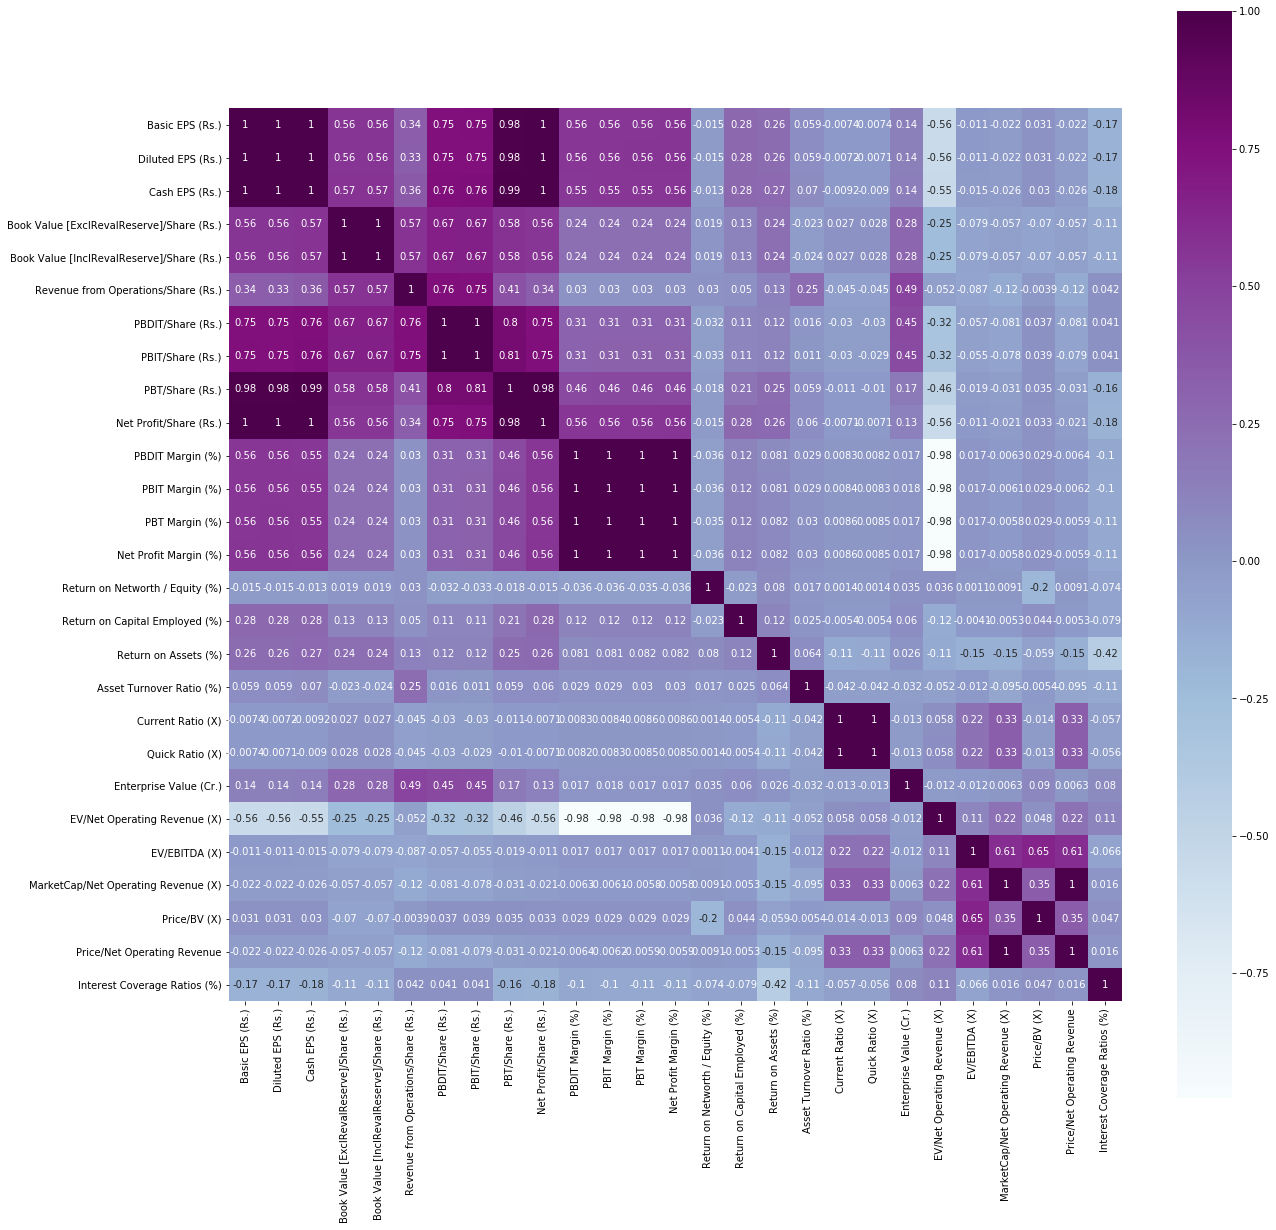

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,square=True,annot=True,cmap="BuPu")
plt.show()

# Logistic Regression

## Splitting Train data & Test data

#### Segregating variables: Independent and Dependent Variables

In [33]:
 #seperating independent and dependent variables
X = df_binned.drop(df_binned[['Interest Coverage Ratios (%)','NBFC Name','S.No.','Year']], axis=1)
y = df_binned['Interest Coverage Ratios (%)']
X.shape, y.shape

((355, 26), (355,))

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2,random_state = 1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(284, 26) (284,)
(71, 26) (71,)


### Implementing Logistic Regression

In [36]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.421855
         Iterations 7
                                             Results: Logit
Model:                       Logit                                 Pseudo R-squared:          0.305     
Dependent Variable:          Interest Coverage Ratios (%)          AIC:                       351.5169  
Date:                        2020-09-01 21:52                      BIC:                       452.1919  
No. Observations:            355                                   Log-Likelihood:            -149.76   
Df Model:                    25                                    LL-Null:                   -215.57   
Df Residuals:                329                                   LLR p-value:               1.8801e-16
Converged:                   1.0000                                Scale:                     1.0000    
No. Iterations:              7.0000                                                                    

### Significant Variable are:
    * Revenue from Operations/Share (Rs.)(Risk Ranking.)
    * PBT Margin (%)(Risk Ranking.)
    * Return on Assets (%)
    * Quick Ratio (X)
    * Enterprise Value (Cr.)
    * EV/EBITDA (X)
    So we just keep these 6 columns and remove others

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   

 

def calculate_vif_(df_binned, thresh=5.0):

    variables = list(range(df_binned.shape[1]))

    dropped = True

    while dropped:

        dropped = False

        vif = [variance_inflation_factor(df_binned.iloc[:, variables].values, ix)

               for ix in range(df_binned.iloc[:, variables].shape[1])]

 

        maxloc = vif.index(max(vif))

        if max(vif) > thresh:

            print('dropping \'' + df_binned.iloc[:, variables].columns[maxloc] +

                  '\' at index: ' + str(maxloc))

            del variables[maxloc]

            dropped = True

 

    print('Remaining variables:')

    print(df_binned.columns[variables])

    return df_binned.iloc[:, variables]

In [39]:
'''cols = ['Revenue from Operations/Share (Rs.)(Risk Ranking.)','PBT Margin (%)(Risk Ranking.)','Return on Assets (%)','Quick Ratio (X)','Enterprise Value (Cr.)','EV/EBITDA (X)']
X=df_binned[cols]
y=df_binned['Interest Coverage Ratios (%)']'''

"cols = ['Revenue from Operations/Share (Rs.)(Risk Ranking.)','PBT Margin (%)(Risk Ranking.)','Return on Assets (%)','Quick Ratio (X)','Enterprise Value (Cr.)','EV/EBITDA (X)']\nX=df_binned[cols]\ny=df_binned['Interest Coverage Ratios (%)']"

In [40]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.421855
         Iterations 7
                                             Results: Logit
Model:                       Logit                                 Pseudo R-squared:          0.305     
Dependent Variable:          Interest Coverage Ratios (%)          AIC:                       351.5169  
Date:                        2020-09-01 21:52                      BIC:                       452.1919  
No. Observations:            355                                   Log-Likelihood:            -149.76   
Df Model:                    25                                    LL-Null:                   -215.57   
Df Residuals:                329                                   LLR p-value:               1.8801e-16
Converged:                   1.0000                                Scale:                     1.0000    
No. Iterations:              7.0000                                                                    

#### Again we remove insignificant variables

In [41]:
cols = ['Return on Assets (%)','Enterprise Value (Cr.)','EV/EBITDA (X)']
X=df_binned[cols]
y=df_binned['Interest Coverage Ratios (%)']

In [42]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.485234
         Iterations 6
                               Results: Logit
Model:              Logit                        Pseudo R-squared: 0.201     
Dependent Variable: Interest Coverage Ratios (%) AIC:              350.5161  
Date:               2020-09-01 21:52             BIC:              362.1325  
No. Observations:   355                          Log-Likelihood:   -172.26   
Df Model:           2                            LL-Null:          -215.57   
Df Residuals:       352                          LLR p-value:      1.5472e-19
Converged:          1.0000                       Scale:            1.0000    
No. Iterations:     6.0000                                                   
------------------------------------------------------------------------------
                           Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------------

## Model Fitting

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Making Prediction


In [44]:
# Predict train data set
predict_train = logreg.predict(X_train)
print('Target on train data',predict_train)

Target on train data [1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0]


In [45]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.8732394366197183


### predict the target on the test dataset

In [46]:
# predict test data set
predict_test = logreg.predict(X_test)
print('Target on test data',predict_test) 

Target on test data [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0]


In [47]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8732394366197183


# MODEL EVALUATION

### CONFUSION MATRIX TEST DATA

Text(0.5, 257.44, 'Predicted label')

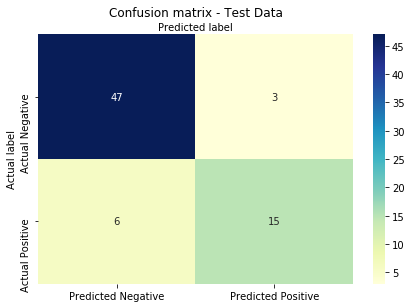

In [48]:
from sklearn import metrics
# Creating the confusion matrix TEST DATA
cm = metrics.confusion_matrix(y_test,predict_test)
# Assigning columns names
cm_df_test = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_df_test), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Test Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
TP =  15
TN =  47
FP =  3
FN =  6
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Psotives :', FP)
print('False Negatives:', FN)

Precision = TP/(TP+FP)

Accuracy = (TP+TN)/(TP+TN+FN+FP)

Recall = TP/(TP+FN)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Type2 = FN/(FN+TP)

Type1 = FP/(TN+FP)

Power = 1- Type2

F_Score = 2*(Precision*Recall)/(Precision+Recall)

print('-'*50)
print('Precision:',Precision)
print('Accuracy:',Accuracy) 
print('Recall:',Recall) 
print('Sensitivity:',Sensitivity) 
print('Specificity:',Specificity) 
print('Type2:',Type2)
print('Type1:',Type1)
print('Power:',Power)
print('F_Score:',F_Score)




True Positives: 15
True Negatives: 47
False Psotives : 3
False Negatives: 6
--------------------------------------------------
Precision: 0.8333333333333334
Accuracy: 0.8732394366197183
Recall: 0.7142857142857143
Sensitivity: 0.7142857142857143
Specificity: 0.94
Type2: 0.2857142857142857
Type1: 0.06
Power: 0.7142857142857143
F_Score: 0.7692307692307692


### CONFUSION MATRIX TRAIN DATA

Text(0.5, 257.44, 'Predicted label')

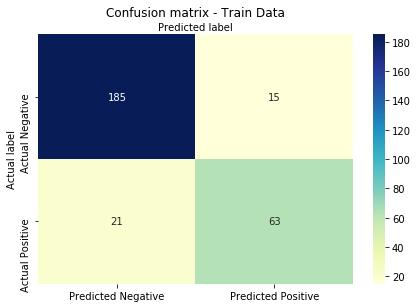

In [50]:
#Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix TRAIN DATA
cm = metrics.confusion_matrix(y_train,predict_train)
# Assigning columns names
cm_df_train = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_df_train), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Train Data', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
TP =  63
TN =  185
FP =  21
FN =  15
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Psotives :', FP)
print('False Negatives:', FN)

Precision = TP/(TP+FP)

Accuracy = (TP+TN)/(TP+TN+FN+FP)

Recall = TP/(TP+FN)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

Type2 = FN/(FN+TP)

Type1 = FP/(TN+FP)

Power = 1- Type2

F_Score = 2*(Precision*Recall)/(Precision+Recall)

print('-'*50)
print('Precision:',Precision)
print('Accuracy:',Accuracy) 
print('Recall:',Recall) 
print('Sensitivity:',Sensitivity) 
print('Specificity:',Specificity) 
print('Type2:',Type2)
print('Type1:',Type1)
print('Power:',Power)
print('F_Score:',F_Score)


True Positives: 63
True Negatives: 185
False Psotives : 21
False Negatives: 15
--------------------------------------------------
Precision: 0.75
Accuracy: 0.8732394366197183
Recall: 0.8076923076923077
Sensitivity: 0.8076923076923077
Specificity: 0.8980582524271845
Type2: 0.19230769230769232
Type1: 0.10194174757281553
Power: 0.8076923076923077
F_Score: 0.7777777777777779


### ROC Curve Test Data

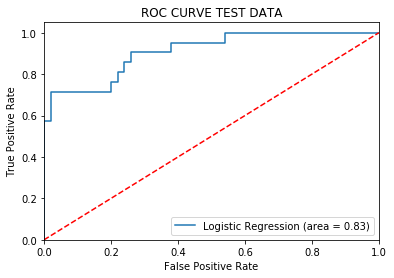

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE TEST DATA')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### ROC CURVE TRAIN DATA

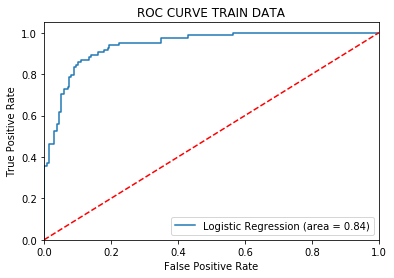

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE TRAIN DATA')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [54]:
# Gini Score Test data
auc = roc_auc_score(y_test, predict_test)
gini1 = 2*auc-1
print("AUC Score:",auc)
print("Gini score:",gini1)


AUC Score: 0.8271428571428572
Gini score: 0.6542857142857144


In [55]:
# Gini Score Train data
auc = roc_auc_score(y_train, predict_train)
gini2 = 2*auc-1
print("AUC Score:",auc)
print("Gini score:",gini2)

AUC Score: 0.8375
Gini score: 0.675


In [56]:
cols = ['Revenue from Operations/Share (Rs.)(Risk Ranking.)','PBT Margin (%)(Risk Ranking.)','Return on Assets (%)','Quick Ratio (X)','Enterprise Value (Cr.)','EV/EBITDA (X)']
X=df_binned[cols]
y=df_binned['Interest Coverage Ratios (%)']

#### k-fold test data

In [57]:

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(logreg, X_test, predict_test, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: name 'mean' is not defined

#### K-fold Train data

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(logreg, X_train, predict_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))